In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1️ Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# 2️ Drop unnecessary columns
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = df['Exited']

# 3️ Convert categorical columns (Gender, Geography) to numeric
X = pd.get_dummies(X, drop_first=True)

# 4️ Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️ Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️ Build the Neural Network
model = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 7️ Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 8️ Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# 9️ Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

#  10 Evaluate performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("✅ Model Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/30


C:\Users\bhosa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6734 - loss: 0.6089 - val_accuracy: 0.7981 - val_loss: 0.4644
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4771 - val_accuracy: 0.8019 - val_loss: 0.4342
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4614 - val_accuracy: 0.8012 - val_loss: 0.4227
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4500 - val_accuracy: 0.8056 - val_loss: 0.4143
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4353 - val_accuracy: 0.8081 - val_loss: 0.4056
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8062 - loss: 0.4221 - val_accuracy: 0.8213 - val_loss: 0.3976
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.4190 - val_accuracy: 0.8238 - val_loss: 0.3922
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8147 - loss: 0.4125 - val_accuracy: 0.8244 - val_

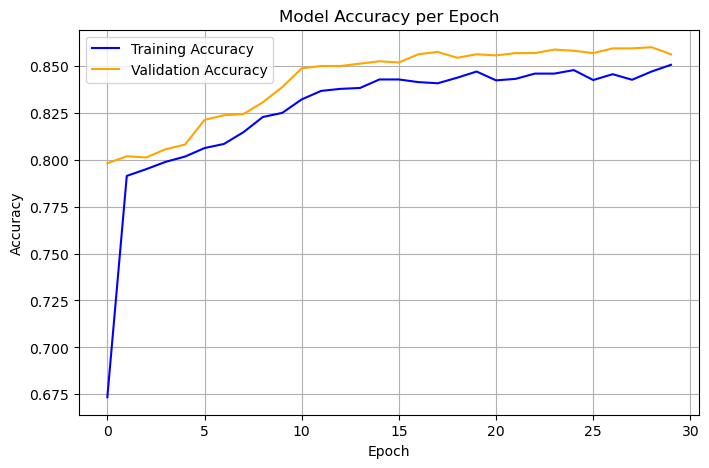

In [8]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()